In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy as sci
import astropy.io.fits as pf

import smooth as sm

%matplotlib inline

In [2]:
def convert_az_alt_to_ha_dec(az,alt,phi):
    x0 = np.cos(np.radians(alt))*np.cos(np.radians(az))
    x1 = np.cos(np.radians(alt))*np.sin(np.radians(az))
    x2 = np.sin(np.radians(alt))

    R = np.matrix([[-np.sin(np.radians(phi)),0,np.cos(np.radians(phi))],[0,-1,0],[np.cos(np.radians(phi)),0,np.sin(np.radians(phi))]])

    x = np.matrix([[x0],[x1],[x2]])

    xp = np.dot(np.transpose(R),x)

    ha = float(np.degrees(np.arctan2(xp[1],xp[0]))) + 360
    dec = float(np.degrees(np.arcsin(xp[2]))) 

    return ha, dec


In [88]:
sun_v = np.load('Sun_data_last.npz')['vv'] 
sun_t = np.load('Sun_data_last.npz')['ttt'] 
sun_t = sun_t - sun_t[0]

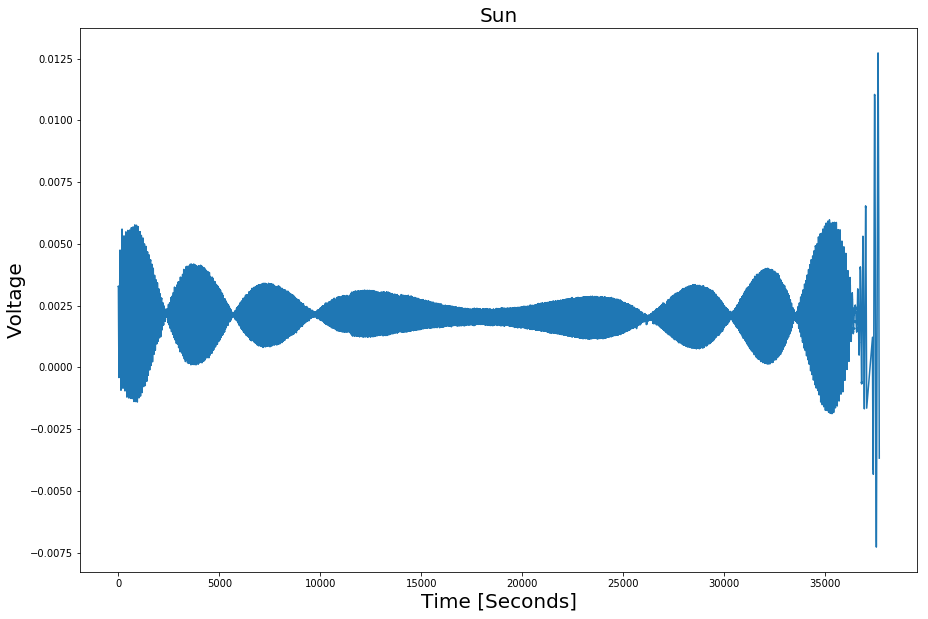

In [90]:
plt.figure(figsize=(15,10))
plt.plot(sun_t, sun_v)
plt.title('Sun', fontsize=20)
plt.xlabel('Time [Seconds]',fontsize=20)
plt.ylabel('Voltage',fontsize=20)
plt.show()

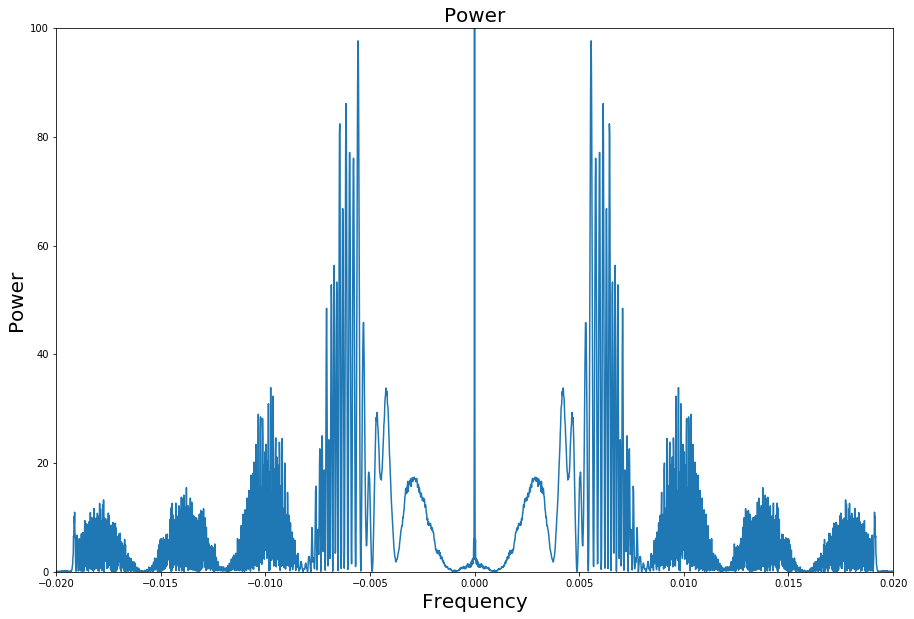

In [102]:
Psun = np.abs(np.fft.fft(sun_v))**2
fsun = np.fft.fftfreq(len(sun_t),0.5)
plt.figure(figsize=(15,10))
plt.plot(np.fft.fftshift(fsun),np.fft.fftshift(Psun))
plt.xlim(-0.02, 0.02)
plt.ylim(0,100)
plt.title('Power',fontsize=20)
plt.xlabel('Frequency',fontsize=20)
plt.ylabel('Power',fontsize=20)
plt.show()


237.45651512229946 Data per minute
1187.2825756114974 Data per 5 minutes
633 leftover after len(sun_v)/data per 5 min
(148375,) Shape of sun_v after subtracting leftovers
125.0
(125, 1187)


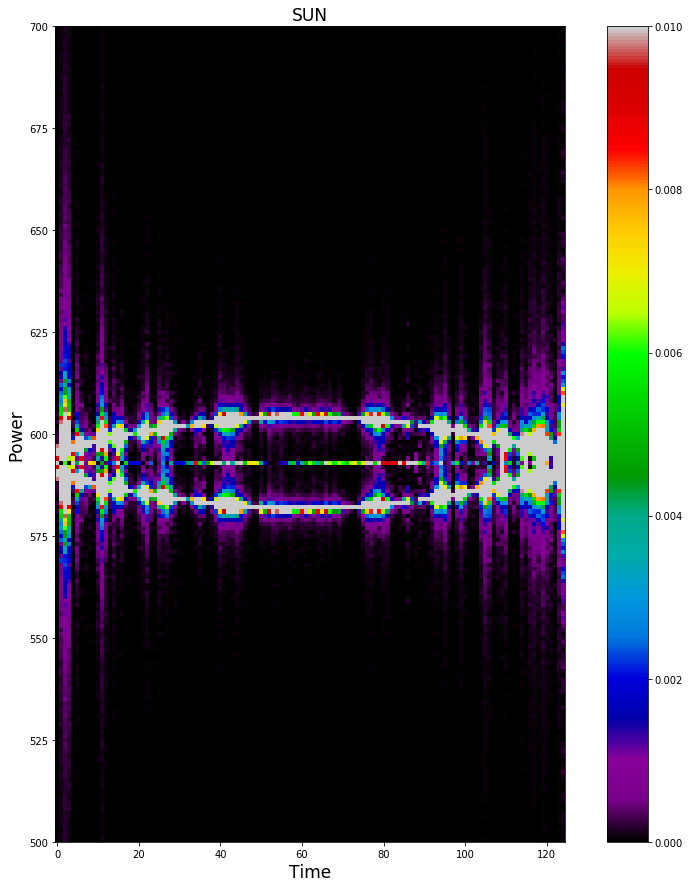

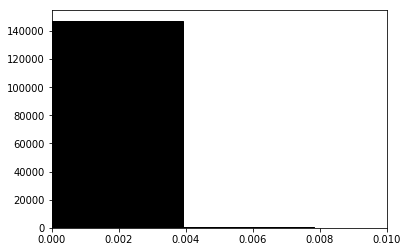

In [92]:
avgsun = np.mean(sun_v)
newsun = sun_v - avgsun
dpm = len(sun_v)/627.517
print(dpm,'Data per minute')
print(dpm*5, 'Data per 5 minutes')
print(len(sun_v)%1187, 'leftover after len(sun_v)/data per 5 min')
R = len(sun_v)%1187
rpsun = newsun[:-R]
print(rpsun.shape, 'Shape of sun_v after subtracting leftovers')

print(148375/1187)
pmin = np.array([])
for i in np.arange(125):
    slices = rpsun[1187*i:1187*(i+1)]#*np.blackman(1187)
    prsun = np.abs(np.fft.fft(slices))**2
    if i == 0:
        pmin = np.append(pmin, np.fft.fftshift(prsun))
    else:
        pmin = np.vstack((pmin, np.fft.fftshift(prsun)))


print(pmin.shape) 
plt.figure(figsize=(15,15))
plt.imshow(np.rot90(pmin), cmap="hot",clim=(0, .01)).set_cmap('nipy_spectral')
plt.ylim(500,700)
plt.title('SUN',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Power',fontsize=17)
plt.colorbar()
plt.show()
plt.hist(pmin.ravel(), bins=256, range=(0.0, 1.0), fc='k', ec='k')
plt.xlim(0,0.01)
plt.show()

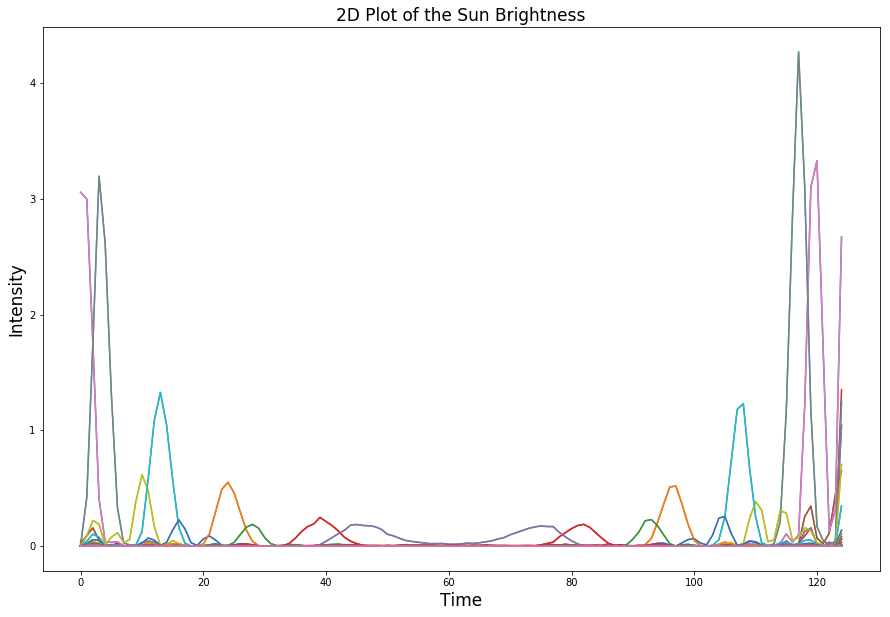

In [93]:
plt.figure(figsize=(15,10))
plt.plot(pmin)
plt.title('2D Plot of the Sun Brightness',fontsize=17)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Intensity',fontsize=17)
# plt.xlim(596, 610)
plt.show()

In [94]:
#################################### CAS A ###############################################
Voltz = np.asarray(np.load('Cas_data_last.npz')['vv'])
Timez = np.asarray(np.load('Cas_data_last.npz')['ttt'])

(162032,)
559.44 Mintues of recording
162032 total data size
289.6324896324896 Data per minute
868.8974688974688 Data per 5 min
1304 Leftover for 5 min window
(160728,)
(111, 1448)


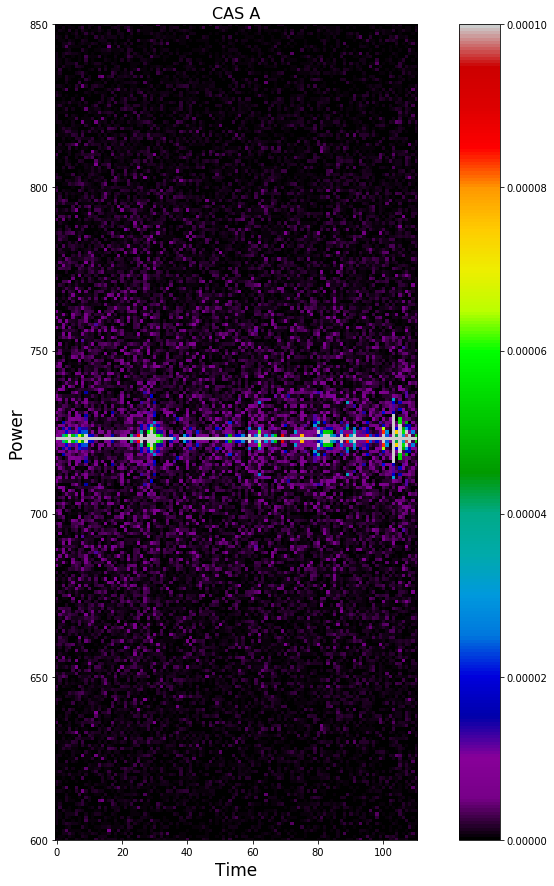

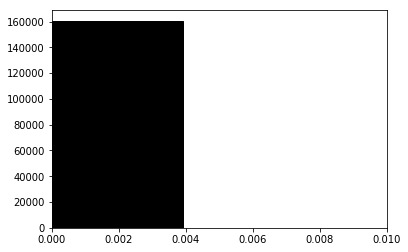

In [95]:
print(Voltz.shape)
newvolt = Voltz - np.mean(Voltz)
#2458192.68758 unix start - 04:30:06.9
#2458193.07628 unix end - 13:49:50.6

#9:19:44 hours of recording
print(559.44, 'Mintues of recording')
print(len(Voltz), 'total data size')
cdpm = len(Voltz)/559.44
print(cdpm, 'Data per minute')

min5 = cdpm*3
print(min5, 'Data per 5 min')
RR = len(newvolt)%1448
print(RR, 'Leftover for 5 min window')
rcas = newvolt[:-RR]
print(rcas.shape)

pcas = np.array([])
for i in np.arange(111):
    cslices = rcas[1448*i:1448*(i+1)]
    prcas = np.abs(np.fft.fft(cslices))**2
    if i == 0:
        pcas = np.append(pcas, np.fft.fftshift(prcas))
    else:
        pcas = np.vstack((pcas, np.fft.fftshift(prcas)))

print(pcas.shape)
plt.figure(figsize=(15,15))
plt.imshow(np.rot90(pcas), cmap="hot",clim=(0, .0001)).set_cmap('nipy_spectral')
plt.ylim(600,850)
plt.title('CAS A', fontsize=16)
plt.xlabel('Time',fontsize=17)
plt.ylabel('Power',fontsize=17)
plt.colorbar()
plt.show()
plt.hist(pcas.ravel(), bins=256, range=(0.0, 1), fc='k', ec='k')
plt.xlim(0,0.01)
plt.show()

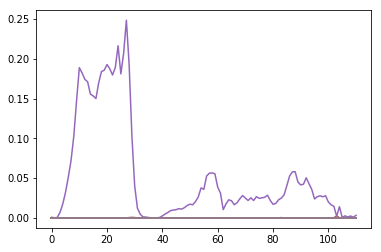

In [96]:
plt.plot(pcas)
plt.show()

In [97]:
#Unix time 	Measured Alt	Measured Az	Correct Alt	Correct Az	westAltitude	westAzimuth	eastAltitude	eastAzimuth

data = np.loadtxt('Cas_coord.txt')

jd = np.array([])
alt = np.array([])
az = np.array([])
c_alt = np.array([])
c_az = np.array([])
alt_w = np.array([])
az_w= np.array([])
alt_e = np.array([])
az_e = np.array([])

for i in range(6116):
    jd1 = data[i][0] #Julian Time
    alt1 = data[i][1] #Measured Alt
    az1 = data[i][2] #Measured Az
    c_alt1 = data[i][3] #Correct Alt
    c_az1 = data[i][4] #Correct Az
    alt_w1 = data[i][5] #westAltitude
    az_w1 = data[i][6] #westAzimuth
    alt_e1 = data[i][7] #eastAltitude
    az_e1 = data[i][8] #eastAzimuth
    jd = np.append(jd, jd1)
    alt = np.append(alt, alt1)
    az = np.append(az, az1)
    c_alt = np.append(c_alt, c_alt1)
    c_az = np.append(c_az, c_az1)
    alt_w = np.append(alt_w, alt_w1)
    az_w = np.append(az_w, az_w1)
    alt_e = np.append(alt_e, alt_e1)
    az_e = np.append(az_e, az_e1)

    

In [98]:
print(jd[0]) #8:02:33
print(jd[6115]) #6:30:04

#total time recording 10:27:31 - 627.517 minutes

print(data.shape)

2458192.68758
2458193.62512
(6116, 9)


In [99]:
B = 20 #meters
B_ew = 20 #Basline EastWest comp
B_ns = 0 #baseline northsouth comp
#lst = 18:23:54 
c = 3e8 #m/s
lam = 0.0025 #meters
Lr = 37.871853 * np.pi/180 #Terrestrial Latitude in radians
L = 37.871853 #Terrestrial Latitude in degrees

ha = np.array([])
dec = np.array([])

for i in np.arange(6116):
    ha1, dec1 = convert_az_alt_to_ha_dec(az[i], alt[i], L)
    ha = np.append(ha, ha1*np.pi/12)
    dec = np.append(dec, dec1)

Qns = (B_ns/lam * np.sin(Lr) * np.cos(dec[0]))
Qew = (B_ew/lam * np.cos(dec[0]))

ff = Qew*np.cos(ha[0]) - Qns*np.sin(ha[0])
print('Local Fringe Frequency of Sun at 0th i = ',ff*(2*np.pi)/(60*60*24), 'HZ')


Local Fringe Frequency of Sun at 0th i =  0.1028950266102666 HZ


In [100]:
def UtoJ(unixSecs):
   return((unixSecs / 86400.0 ) + 2440587.5)


In [101]:
UtoJ(1521039753.26)

#18:23:54 LST for this unix time using http://www.wwu.edu/skywise/skymobile/skywatch.html

2458192.1267738426

In [15]:

matarr = np.array([])
for i in np.arange(6116):
    B_ew = 20
    B_ns = 0
    Qns = (B_ns/lam * np.sin(Lr) * np.cos(np.mean(dec)))
    Qew = (B_ew/lam * np.cos(np.mean(dec)))
    vtg = Qew*np.sin(ha[i]) + Qns*np.cos(ha[i])
    x = 2*np.pi*vtg
    matrix = np.matrix([[np.cos(x), np.sin(x)]])
    if i == 0:
        matarr = np.append(matarr, matrix)
    else:
        matarr = np.vstack((matarr, matrix))
print(matarr)
b = np.array([])
for i in np.arange(6116):
    Qns = (B_ns/lam * np.sin(Lr) * np.cos(dec[i]))
    Qew = (B_ew/lam * np.cos(dec[i]))
    ff = Qew*np.cos(ha[i]) - Qns*np.sin(ha[i])
    if i == 0:
        b = np.append(b, ff)
    else:
        b = np.vstack((b, ff))


dot1 = np.dot(matarr.T, matarr)
dot2 = np.dot(1/(dot1),matarr.T)

AB = np.dot(dot2, b)
print(b)

[[-0.35629022 -0.93437534]
 [-0.62490047  0.78070443]
 [ 0.03472638  0.99939686]
 ...
 [ 0.22479418 -0.97440627]
 [ 0.03887939  0.99924391]
 [ 0.00674336 -0.99997726]]
[[1414.90818184]
 [1497.08532712]
 [1578.9351014 ]
 ...
 [4322.74750168]
 [4373.23892806]
 [4427.27602707]]


In [16]:
print(Voltz.shape)
print(jd.shape)

r = len(Voltz)%len(jd)
print(r, 'r')
voltlol =  Voltz[:-r]
print(voltlol.shape, 'voltlol')
print(len(voltlol)/len(jd), 'data per timestamp')

print(len(voltlol)/25)

newvolt = np.array([])
for i in np.arange(6116):
    slice54 = voltlol[25*i:25*(i+1)]
    avg = np.mean(slice54)
    newvolt = np.append(newvolt, avg)
print(newvolt)


(162032,)
(6116,)
3016 r
(159016,) voltlol
26.0 data per timestamp
6360.64
[0.00156084 0.0015688  0.00156976 ... 0.00157096 0.00156092 0.00157296]


In [17]:
matvolt = np.array([])
for i in np.arange(6116):
    if i == 0:
        matvolt = np.append(matvolt, newvolt[i])
    else:
        matvolt = np.vstack((matvolt,newvolt[i]))
AB = np.dot(dot2, newvolt)
print(matvolt)

[[0.00156084]
 [0.0015688 ]
 [0.00156976]
 ...
 [0.00157096]
 [0.00156092]
 [0.00157296]]


In [18]:
dot1 = np.dot(matarr.T, matarr)
dot2 = np.dot(1/(dot1),matarr.T)

AB = np.dot(dot2, matvolt)
print(AB)

[[0.00306133]
 [0.00182853]]


In [19]:
###################### CAS ########################
print('volt size = ', len(Voltz))
print('Time size =', len(jd))
print('Total Record Time is 559.44 mintues')
sec = 559.44*60
print(sec/len(Voltz), 'Seconds per data')

volt size =  162032
Time size = 6116
Total Record Time is 559.44 mintues
0.20715907968796288 Seconds per data


In [20]:
import astropy.time
import time


def unix_time(jd=None):
    '''Return (current) time, in seconds since the Epoch (00:00:00 
    Coordinated Universal Time (UTC), Thursday, 1 January 1970).
    Parameters
    ----------
    jd : float, julian date, default=now

    Returns
    -------
    t : float, seconds since the Epoch'''
    if jd is None:
        return time.time()
    else:
        t = astropy.time.Time(jd, format='jd')
        return t.unix

In [21]:
print(unix_time(jd[0]), 'Cas Begin in UNIX')
print(unix_time(jd[2733]), 'Cas End in UNIX')


1521088206.9120126 Cas Begin in UNIX
1521123478.847994 Cas End in UNIX


In [22]:
testsA=np.array([])
testsB =np.array([])
for i in np.arange(1):
    B_ew = i+1
    B_ns = 0.1*(i+1)
    matarr = np.array([])
    for i in np.arange(6116):
        Qns = (B_ns/lam * np.sin(Lr) * np.cos(np.mean(dec)))
        Qew = (B_ew/lam * np.cos(np.mean(dec)))
        vtg = Qew*np.sin(ha[i]) + Qns*np.cos(ha[i])
        x = 2*np.pi*vtg
        matrix = np.matrix([[np.cos(x), np.sin(x)]])
        if i == 0:
            matarr = np.append(matarr, matrix)
        else:
            matarr = np.vstack((matarr, matrix))


    b = np.array([])
    for i in np.arange(6116):
        Qns = (B_ns/lam * np.sin(Lr) * np.cos(dec[i]))
        Qew = (B_ew/lam * np.cos(dec[i]))
        ff = Qew*np.cos(ha[i]) - Qns*np.sin(ha[i])
        if i == 0:
            b = np.append(b, ff)
        else:
            b = np.vstack((b, ff))


    #############################################################################################

    r = len(Voltz)%len(jd)
    voltlol =  Voltz[:-r]

    newvolt = np.array([])
    for i in np.arange(6116):
        slice54 = voltlol[25*i:25*(i+1)]
        avg = np.mean(slice54)
        newvolt = np.append(newvolt, avg)

    ##############################################################################################
    matvolt = np.array([])
    for i in np.arange(6116):
        if i == 0:
            matvolt = np.append(matvolt, newvolt[i])
        else:
            matvolt = np.vstack((matvolt,newvolt[i]))
    AB = np.dot(dot2, newvolt)

    dot1 = np.dot(matarr.T, matarr)
    dot2 = np.dot(1/(dot1),matarr.T)

    AB = np.dot(dot2, matvolt)
    

    testsA = np.append(testsA, AB[0])
    testsB = np.append(testsB, AB[1]) 

In [24]:
B_ew = np.linspace(10,30,700)
B_ns = 0.1*B_ew
print(B_ew.shape)

(700,)


In [68]:
# Qns = (B_ns/lam * np.sin(Lr) * np.cos(np.mean(dec)))
# Qew = (B_ew/lam * np.cos(np.mean(dec)))
# #ff = Qew*np.cos(ha) - Qns*np.sin(ha)
# print(Qns.shape)

# tot = np.array([])
# for i in np.arange(700):
    